In [1]:
from __future__ import division

import pdb
import sys
import argparse
import itertools

import numpy as np

import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

sys.path.insert(0, '../../../figures')
import plot_utils as pu
import color_scheme as cs

Load data

In [2]:
S, theta, sigma, t_max_theta, t_max_sigma = np.load("data/data.npy", allow_pickle=True)
tau = 10.

Plot

[[ 89  89  89  89  87  86  83  81  78  75]
 [183 184 184 184 183 182 179 175 169 162]
 [335 336 337 338 340 341 343 344 344 341]
 [640 636 635 637 642 648 651 650 647 644]]


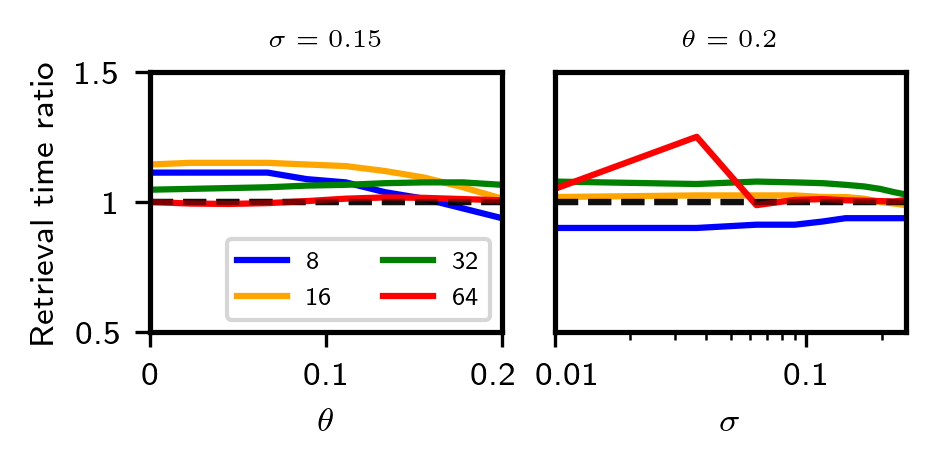

In [23]:
pu.figure_setup()
fig_size = pu.get_fig_size(8, 3.5)
fig = plt.figure(figsize=fig_size)

gs1 = gridspec.GridSpec(1, 2)
gs1.update(left=0.15, right=0.95, bottom=0.25, wspace=0.15)
ax1 = plt.subplot(gs1[:, 0])
ax2 = plt.subplot(gs1[:, 1])

# Panel a
t_max_theta = np.asarray(t_max_theta).reshape((len(S),len(theta)))
print(t_max_theta)
colors = ['blue','orange','green','red']
for i, row in enumerate(t_max_theta):
    ax1.plot(theta, row/S[i]/tau*1e3, color=colors[i], linestyle='solid', label=S[i])
    ax1.plot(theta, np.ones_like(theta)*1e3, color='k', alpha=0.5, linestyle='dashed')
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel("Retrieval time ratio")
ax1.set_ylim([500,1500])
ax1.set_yticks([500, 1000, 1500])
ax1.set_yticklabels([0.5,1,1.5])
ax1.set_xlim([0,0.2])
ax1.set_xticklabels([0,0.1,0.2])
ax1.set_xticks([0,0.1,0.2])
ax1.set_title(r"$\sigma=0.15$")
ax1.legend(loc=4, ncol=2)

dx = -2/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax1.xaxis.get_majorticklabels()[-1:]:
    label.set_transform(label.get_transform() + offset)

# Panel b
t_max_sigma = np.asarray(t_max_sigma).reshape((len(S),len(sigma)))
for i, row in enumerate(t_max_sigma):
    ax2.semilogx(sigma, row/S[i]/tau*1e3, color=colors[i], linestyle='solid')
    ax2.plot(sigma, np.ones_like(theta)*1e3, color='k', alpha=0.5, linestyle='dashed')
ax2.set_xlabel(r"$\sigma$")
ax2.set_ylim([500,1500])
ax2.set_yticks([])
ax2.set_xlim([0.01,0.25])
ax2.set_xticks([0.01,0.1])
ax2.set_xticklabels([0.01,0.1])
ax2.set_title(r"$\theta=0.2$")

dx = 3/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax2.xaxis.get_majorticklabels()[:1]:
    label.set_transform(label.get_transform() + offset)

plt.subplots_adjust(bottom=0.25, left=0.2)
plt.savefig("../output/3.pdf", dpi=300, bbox_inches="tight");